In [1]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
# rename header to make easier to interpret what each column means
# see link below for detailed description for each header
# https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html
df_cleaned_headers = pd.read_csv("exoplanet_data_headers.csv")
# Drop the null columns where all values are null
df_cleaned_headers = df_cleaned_headers.dropna(axis='columns', how='all')
# Drop the null rows
df_cleaned_headers = df_cleaned_headers.dropna()
df_cleaned_headers.head()

,koi_disposition,not_transit_like_flag,stellar_eclipse_flag,centroid_offset_flag,ephemeris_match_contamination_flag,orbital_period_days,koi_period_err1,koi_period_err2,transit_epoch,koi_time0bk_err1,...,koi_steff_err2,stellar_surface_gravity,koi_slogg_err1,koi_slogg_err2,stellar_radius,koi_srad_err1,koi_srad_err2,ra,dec,kepler_band_mag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [4]:
columns = ['koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 'koi_insol_err1', 'koi_insol_err2', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'kepler_band_mag']
df_cleaned_headers.drop(columns, inplace=True, axis=1)
df_cleaned_headers.head()

,koi_disposition,not_transit_like_flag,stellar_eclipse_flag,centroid_offset_flag,ephemeris_match_contamination_flag,orbital_period_days,transit_epoch,impact_parameter,transit_duration_hours,transit_depth_ppm,planetary_radius,temperature_kelvin,insolation_flux,transit_signal_to_noise,tce_planet_number,stellar_effective_temperature_kelvin,stellar_surface_gravity,stellar_radius
0,CONFIRMED,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,9.11,25.8,2,5455,4.467,0.927
1,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,39.30,76.3,1,5853,4.544,0.868
2,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,891.96,505.6,1,5805,4.564,0.791
3,CONFIRMED,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,926.16,40.9,1,6031,4.438,1.046
4,CONFIRMED,0,0,0,0,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160,427.65,40.2,2,6046,4.486,0.972


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
selected_features = df_cleaned_headers[['orbital_period_days', 'transit_epoch', 'impact_parameter', 'transit_duration_hours', 'transit_depth_ppm', 'planetary_radius', 'temperature_kelvin', 'insolation_flux', 'transit_signal_to_noise', 'tce_planet_number', 'stellar_effective_temperature_kelvin', 'stellar_surface_gravity', 'stellar_radius', 'not_transit_like_flag', 'stellar_eclipse_flag', 'centroid_offset_flag', 'ephemeris_match_contamination_flag']]
selected_features.head()

,orbital_period_days,transit_epoch,impact_parameter,transit_duration_hours,transit_depth_ppm,planetary_radius,temperature_kelvin,insolation_flux,transit_signal_to_noise,tce_planet_number,stellar_effective_temperature_kelvin,stellar_surface_gravity,stellar_radius,not_transit_like_flag,stellar_eclipse_flag,centroid_offset_flag,ephemeris_match_contamination_flag
0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,9.11,25.8,2,5455,4.467,0.927,0,0,0,0
1,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,39.30,76.3,1,5853,4.544,0.868,0,1,0,0
2,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,891.96,505.6,1,5805,4.564,0.791,0,1,0,0
3,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,926.16,40.9,1,6031,4.438,1.046,0,0,0,0
4,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160,427.65,40.2,2,6046,4.486,0.972,0,0,0,0


In [6]:
selected_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 0 to 6990
Data columns (total 17 columns):
orbital_period_days                     6991 non-null float64
transit_epoch                           6991 non-null float64
impact_parameter                        6991 non-null float64
transit_duration_hours                  6991 non-null float64
transit_depth_ppm                       6991 non-null float64
planetary_radius                        6991 non-null float64
temperature_kelvin                      6991 non-null int64
insolation_flux                         6991 non-null float64
transit_signal_to_noise                 6991 non-null float64
tce_planet_number                       6991 non-null int64
stellar_effective_temperature_kelvin    6991 non-null int64
stellar_surface_gravity                 6991 non-null float64
stellar_radius                          6991 non-null float64
not_transit_like_flag                   6991 non-null int64
stellar_eclipse_flag             

In [7]:
X = selected_features
y = df_cleaned_headers["koi_disposition"]
print(X.shape, y.shape)

(6991, 17) (6991,)


In [8]:
#preprocess "koi_disposition" use one hot to make numeric
data = y.copy()
data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,CANDIDATE,CONFIRMED,FALSE POSITIVE
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


# Create a Train Test Split

Use `koi_disposition` for the y values

In [9]:
from sklearn.model_selection import train_test_split

#y = pd.get_dummies(y)
print(X.shape, y.shape)
feature_names = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

X_train.head()

(6991, 17) (6991,)


,orbital_period_days,transit_epoch,impact_parameter,transit_duration_hours,transit_depth_ppm,planetary_radius,temperature_kelvin,insolation_flux,transit_signal_to_noise,tce_planet_number,stellar_effective_temperature_kelvin,stellar_surface_gravity,stellar_radius,not_transit_like_flag,stellar_eclipse_flag,centroid_offset_flag,ephemeris_match_contamination_flag
6080,12.496435,132.035800,1.1700,84.32000,271.7,55.34,1397,899.44,141.5,1,6821,3.805,2.730,1,0,0,0
3001,11.615625,131.968430,0.9770,2.23300,191.2,2.84,905,158.69,8.8,2,5332,4.083,1.453,0,0,0,0
570,10.980246,137.137607,0.7330,3.74464,50078.0,21.94,821,107.47,1555.4,1,5952,4.462,0.897,0,1,0,0
4897,466.908240,136.373100,0.0868,2.64000,660.0,2.19,210,0.46,5.4,1,5340,4.456,0.867,1,0,0,0
625,1.061933,133.850441,0.7130,2.14290,133.6,2.29,2508,9391.15,80.2,1,6134,3.975,1.851,0,1,1,1


In [10]:
y_train.head()

6080    FALSE POSITIVE
3001         CANDIDATE
570     FALSE POSITIVE
4897    FALSE POSITIVE
625     FALSE POSITIVE
Name: koi_disposition, dtype: object

In [11]:
y_test.head()

2106         CANDIDATE
2841    FALSE POSITIVE
3377    FALSE POSITIVE
5092    FALSE POSITIVE
47           CANDIDATE
Name: koi_disposition, dtype: object

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [13]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
#y_minmax = MinMaxScaler().fit(y_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)
#y_train_minmax = y_minmax.transform(y_train)
#y_test_minmax = y_minmax.transform(y_test)

C:\Users\jjtre\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


k: 1, Train/Test Score: 1.000/0.799
k: 3, Train/Test Score: 0.896/0.807
k: 5, Train/Test Score: 0.867/0.815
k: 7, Train/Test Score: 0.857/0.812
k: 9, Train/Test Score: 0.851/0.820
k: 11, Train/Test Score: 0.842/0.827
k: 13, Train/Test Score: 0.842/0.824
k: 15, Train/Test Score: 0.842/0.822
k: 17, Train/Test Score: 0.844/0.824
k: 19, Train/Test Score: 0.844/0.822
k: 21, Train/Test Score: 0.842/0.824
k: 23, Train/Test Score: 0.842/0.826
k: 25, Train/Test Score: 0.843/0.830
k: 27, Train/Test Score: 0.839/0.825
k: 29, Train/Test Score: 0.838/0.822
k: 31, Train/Test Score: 0.836/0.827
k: 33, Train/Test Score: 0.837/0.828
k: 35, Train/Test Score: 0.834/0.827
k: 37, Train/Test Score: 0.835/0.823
k: 39, Train/Test Score: 0.831/0.823
k: 41, Train/Test Score: 0.830/0.826
k: 43, Train/Test Score: 0.829/0.826
k: 45, Train/Test Score: 0.831/0.821
k: 47, Train/Test Score: 0.830/0.818
k: 49, Train/Test Score: 0.828/0.819
k: 51, Train/Test Score: 0.828/0.819
k: 53, Train/Test Score: 0.828/0.819
k: 55,

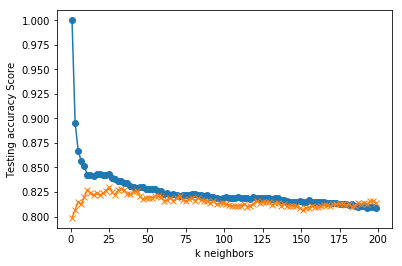

In [17]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 200, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_minmax, y_train)
    train_score = knn.score(X_train_minmax, y_train)
    test_score = knn.score(X_test_minmax, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 200, 2), train_scores, marker='o')
plt.plot(range(1, 200, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# Train the Model



In [20]:
# train the model
# Note that k: 43 seems to be the best choice for this dataset smallest difference between training and test data r2 score
knn = KNeighborsClassifier(n_neighbors=43)
knn.fit(X_train_minmax, y_train)
print('k=43 Test Acc: %.3f' % knn.score(X_test_minmax, y_test))

print(f"Training Data Score: {knn.score(X_train_minmax, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_minmax, y_test)}")

k=43 Test Acc: 0.826
Training Data Score: 0.829105473965287
Testing Data Score: 0.8260869565217391


In [22]:
# train the model
# Note that k: 25 maximizes r2 score for test data
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_minmax, y_train)
print('k=25 Test Acc: %.3f' % knn.score(X_test_minmax, y_test))

print(f"Training Data Score: {knn.score(X_train_minmax, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_minmax, y_test)}")

k=25 Test Acc: 0.830
Training Data Score: 0.8432195308029754
Testing Data Score: 0.830091533180778


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [20]:
# Support vector machine linear classifier
#from sklearn.svm import SVC 
#model = SVC(kernel='linear')

In [21]:
# Create the GridSearchCV model
#from sklearn.model_selection import GridSearchCV
#param_grid = {'C': [1, 5, 10],
#              'gamma': [0.0001, 0.001, 0.01]}
#grid = GridSearchCV(model, param_grid, verbose=3, cv=5, iid=False)

In [22]:
#X1 = selected_features
#y1 = df_cleaned_headers["koi_disposition"]

In [23]:
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42, stratify=y1)

#X1_train.head()

In [24]:
# Train the model with GridSearch
#grid.fit(X1_train, y1_train)

In [25]:
#print(grid.best_params_)
#print(grid.best_score_)

In [26]:
# Make predictions with the hypertuned model
#predictions = grid.predict(X_test)

In [27]:
# Calculate classification report
#from sklearn.metrics import classification_report
#print(classification_report(y_test, predictions,
#                            target_names=["CANDIDATE", "CONFIRMED", "FALSE POSITIVE"]))

# Save the Model

In [23]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'jason_klug_KNN.sav'
joblib.dump(knn, filename)

['jason_klug_KNN.sav']